#### The primary goal of this analysis is to determine hotspots of 911 calls for  violent crimes.
I will first load two dataframes(calls_for_service and call_for_violent_crimes) from data wrandling notebook. In this notebook, I will try to get more insight of crime data by plotting data on graphs and creating crime hotspots on map.

The statistical significance of these observations will be tested in the next section Exploratory Data Analysis.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np

In [5]:
# Call the dataframes saved on datawrangling notebook
%store -r calls_for_service
%store -r calls_for_violent_crimes
#calls_for_violent_crimes.count()

### For which city, more calls were reported for violent crimes?

In [6]:
#Group by Violent crimes by city
calls_for_violent_crimes.groupby(['city','original_crimetype_name']).size()

city           original_crimetype_name
Daly City      Aggravated Assault/ADW        1
               Robbery                       5
Presidio       Robbery                       1
San Francisco  Aggravated Assault/ADW      122
               Homicide                      7
               Rape/Sexual Assault          87
               Robbery                    1759
Treasure Isla  Robbery                       5
Yerba Buena    Robbery                       1
dtype: int64

Occurences of robberies far outnumbered the other crimes.

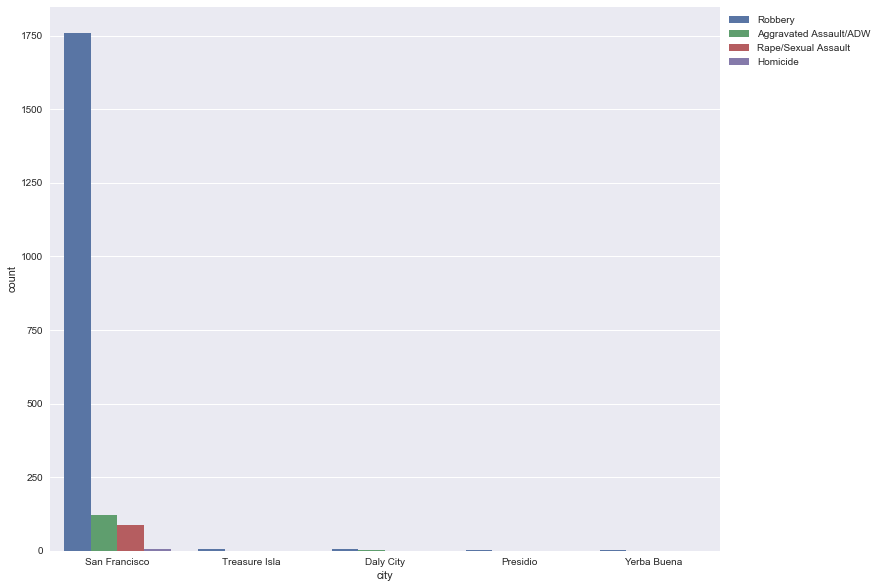

In [8]:
#calls_for_violent_crimes['Reason']=calls_for_violent_crimes['original_crimetype_name'].apply(lambda s:s.split(':')[0])
sns.set(style='darkgrid')
width=12
height=10
figure(figsize=(width,height))
sns.countplot(x='city', hue='original_crimetype_name', data=calls_for_violent_crimes)
plt.legend(bbox_to_anchor=(1,1))

Most of the calls are received from San francisco city.Cities listed above are small compared to San francisco city so in my opinion,demographic of the city played an inportant part in the number of calls above.

### Let's now see the number of calls made each year.

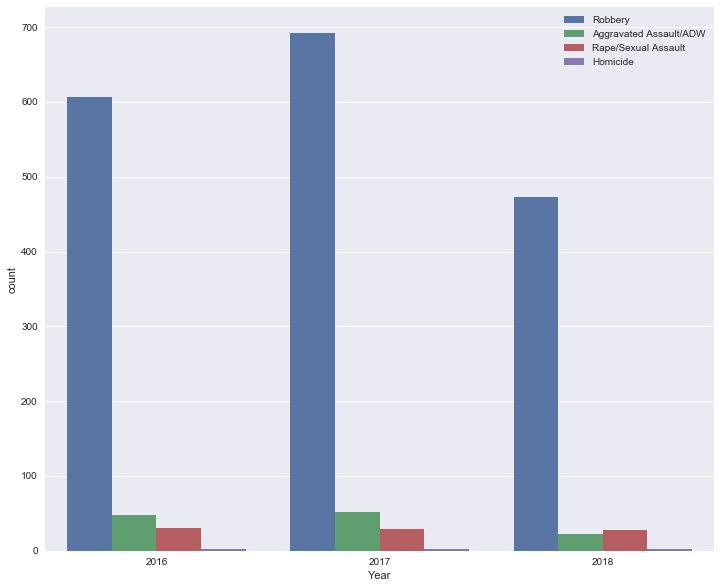

In [9]:
sns.set(style='darkgrid')
width=12
height=10
figure(figsize=(width,height))
calls_for_violent_crimes['Year'] = calls_for_violent_crimes['call_dttm'].apply(lambda x: x.strftime('%Y'))
sns.countplot(x='Year', hue='original_crimetype_name', data=calls_for_violent_crimes)
plt.legend(bbox_to_anchor=(1,1))

As dataset covers the period 03/31/2016-present, data for 2018 is not complete. We can still compare 2016's and 2017's data. An upword trend in robbery calls can be observed from 2016 to 2017. There is no incrase in other violent crimes though.

### Plot 911 Calls for violent crimes by month and hour of the day

Text(0.5,1,'911 Calls for all violent crimes by month and hour of the day')

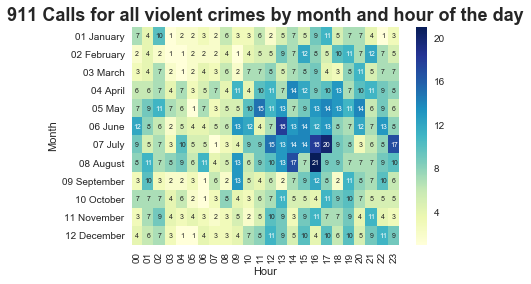

In [10]:
calls_for_violent_crimes['event']= 1
calls_for_violent_crimes['Month'] = calls_for_violent_crimes['call_dttm'].apply(lambda x: x.strftime('%m %B'))
calls_for_violent_crimes['Hour'] = calls_for_violent_crimes['call_dttm'].apply(lambda x: x.strftime('%H'))
#p=pd.pivot_table(calls_for_violent_crimes,values='dummy_variable', index=['Month'] , columns=['Hour'], aggfunc=np.sum)
p=calls_for_violent_crimes.pivot_table(index=['Month'] , columns=['Hour'], values='event',aggfunc=np.sum).fillna(method='ffill')
ax = sns.heatmap(p,cmap="YlGnBu",annot=True, annot_kws={"size": 7})
ax.set_title('911 Calls for all violent crimes by month and hour of the day',fontsize=18, fontweight="bold")

From above heatmap, it is interesting to see note that in aggregate, there is a spike in no. of calls for violent crimes during summer.

This proves the old theory that,increased temperatures in summer drive many out of doors and to leave windows open in their homes.Also, increased daylight hours can lengthen the amount of time people spend away from their homes raise the amount of people in public and the amount of time that homes are left empty. Others point to the effect of students on summer vacation, who are otherwise occupied with schooling during other seasons; still others postulate that suffering heat-induced discomfort simply makes people more aggressive and likely to act out.

Text(0.5,1,'Homicide')

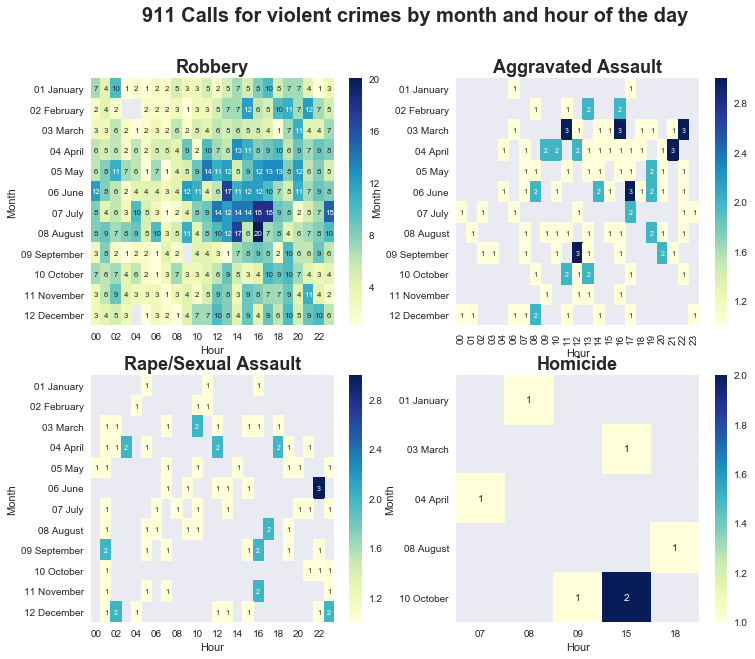

In [9]:
g1 = calls_for_violent_crimes[(calls_for_violent_crimes.original_crimetype_name.str.match(r'Robbery'))]
p1 = g1.pivot_table(index=['Month'] , columns=['Hour'], values='event',aggfunc=np.sum)
g2 = calls_for_violent_crimes[(calls_for_violent_crimes.original_crimetype_name.str.match(r'Aggravated Assault/ADW'))]
p2 = g2.pivot_table(index=['Month'] , columns=['Hour'], values='event',aggfunc=np.sum)
g3 = calls_for_violent_crimes[(calls_for_violent_crimes.original_crimetype_name.str.match(r'Rape/Sexual Assault'))]
p3 = g3.pivot_table(index=['Month'] , columns=['Hour'], values='event',aggfunc=np.sum)
g4 = calls_for_violent_crimes[(calls_for_violent_crimes.original_crimetype_name.str.match(r'Homicide'))]
p4 = g4.pivot_table(index=['Month'] , columns=['Hour'], values='event',aggfunc=np.sum)
#for p in (p1,p2,p3,p4):
#ax = plt.axes()
fig,ax = plt.subplots(nrows=2, ncols=2, squeeze=False, figsize = [12, 10] ) 
plt.suptitle("911 Calls for violent crimes by month and hour of the day", fontsize=20, fontweight="bold")
s1=sns.heatmap(p1,cmap="YlGnBu", ax=ax[0,0],annot=True, annot_kws={"size": 8})
s1.set_title("Robbery", fontsize=18, fontweight="bold")
s2=sns.heatmap(p2,cmap="YlGnBu", ax=ax[0,1],annot=True, annot_kws={"size": 7})
s2.set_title("Aggravated Assault", fontsize=18, fontweight="bold")
s3=sns.heatmap(p3,cmap="YlGnBu", ax=ax[1,0],annot=True, annot_kws={"size": 7})
s3.set_title("Rape/Sexual Assault", fontsize=18, fontweight="bold")
s4=sns.heatmap(p4,cmap="YlGnBu", ax=ax[1,1],annot=True, annot_kws={"size": 10})
s4.set_title("Homicide", fontsize=18, fontweight="bold")


It is also intersting to note that the calls are mostly made from 9:00 am to 2:00 am.One can observe some clear drops in numbers around 3:00 am to 8:00 am in the morning. From the spike in calls right after the drop, it seems like the most frequent crime like robbery might have happened when people are asleep and businesses are closed.

Aggravated Assault is mostly reported from noon till midnight.Looking at this data one should understand that,by day, San Francisco is as safe as any big city neighborhood. But at night, it's wise for everyone to stick to streets with lots of foot traffic, or travel with an equally alert, sensible companion.

It can be observed that rape or sexual assault has no specific time of reporting.

We only have 7 incidents of homicides* and most of them are reported during day time.

(*This does not mean that SF had only 7 homisides in part 2 and a half years. There were oly 7 calls made for homicide.)


### Plot the crimes on San Francisco City map

In [10]:
from geopy import geocoders
from geopy.geocoders import Nominatim

### Plot crimes reported at prmise address 

In [11]:
violent_crimes_at_premise_address= calls_for_violent_crimes[calls_for_violent_crimes['address_type']=='Premise Address']
address = violent_crimes_at_premise_address['address'].unique()

In [12]:
violent_crimes_at_premise_address['address']= violent_crimes_at_premise_address.apply(lambda x:'%s %s %s' % (x['address'],x['city'],x['state']),axis=1)
violent_crimes_at_premise_address['address']= violent_crimes_at_premise_address.address.str.replace('Block Of' , '')

C:\Users\R2D2\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\R2D2\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
geolocator =  Nominatim(user_agent="my-application")
loc_coordinates = []
loc_address = []
for address in violent_crimes_at_premise_address.address:
        place = address
        location = geolocator.geocode(place, timeout=15)
        if location:
                lat=location.latitude
                long=location.longitude
        else :
                lat = None
                long = None
        #print(location.address)
        #print("POINT({},{})".format(location.latitude,location.longitude))
        loc_coordinates.append((lat, long))
        loc_address.append(place)
df_geocodes = pd.DataFrame({'coordinate':loc_coordinates,'address':loc_address})

In [15]:
df_geocodes=df_geocodes.drop_duplicates()
df_geocodes[['lat', 'long']] = df_geocodes['coordinate'].apply(pd.Series)
df_geocodes = df_geocodes.drop('coordinate',axis=1)
violent_crimes_at_premise_address= violent_crimes_at_premise_address.merge(df_geocodes, how= 'outer')
violent_crimes_at_premise_address.dropna(subset=['lat'], inplace=True)
violent_crimes_at_premise_address.head()

C:\Users\R2D2\Anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,address,address_type,call_dttm,city,crime_id,disposition,offense_date,original_crimetype_name,report_date,state,event,Month,Hour,lat,long
0,200 Taylor St San Francisco CA,Premise Address,2016-09-20 17:48:00,San Francisco,162643133,REP,2016-09-20T00:00:00.000,Robbery,2016-09-20T00:00:00.000,CA,1,09 September,17,37.784276,-122.410874
1,200 Taylor St San Francisco CA,Premise Address,2016-06-29 12:49:00,San Francisco,161811905,HAN,2016-06-29T00:00:00.000,Robbery,2016-06-29T00:00:00.000,CA,1,06 June,12,37.784276,-122.410874
2,200 Taylor St San Francisco CA,Premise Address,2016-09-15 20:10:00,San Francisco,162593955,UTL,2016-09-15T00:00:00.000,Aggravated Assault/ADW,2016-09-15T00:00:00.000,CA,1,09 September,20,37.784276,-122.410874
3,0 Gough St San Francisco CA,Premise Address,2016-09-21 11:54:00,San Francisco,162651899,HAN,2016-09-21T00:00:00.000,Robbery,2016-09-21T00:00:00.000,CA,1,09 September,11,37.772962,-122.422219
4,100 Ellis St San Francisco CA,Premise Address,2016-09-22 03:44:00,San Francisco,162660397,REP,2016-09-22T00:00:00.000,Robbery,2016-09-22T00:00:00.000,CA,1,09 September,03,37.785554,-122.408023


In [23]:
import folium
# Make an empty map
map1= folium.Map(location=[37.76, -122.45],tiles='OpenStreetMap', zoom_start=12)
#map2 = folium.Map(location=[37.76, -122.45], zoom_start=12)

for each in violent_crimes_at_premise_address[:1000].iterrows():
    folium.CircleMarker([each[1]['lat'],each[1]['long']],
                        radius=3,
                        #color='red',
                        popup=str(each[1]['lat'])+','+str(each[1]['long']),
                        #fill_color='#FD8A6C'
                        color='crimson',
                        fill=True,
                        fill_color='crimson'

                        ).add_to(map1)
display(map1)
# Save it as html
map1.save('mymap1.html')

There’s a couple ways to interpret above map. Ultimately here’s the breakdown

1.Most of the area around market street in Tenderloin and around Civic center has more reported crimes.
Tenderloin has always been considered as a dangerous area. 
2.Surprisingly, the nicer neighborhoods such as SOMA, the Marina District, has also some reports of violent crime.
3.Area like Fillmore, Hunters point, bays view, outer mission are also has alarming reports of violent crime. 

### Plot crimes reported at public places

In [24]:
violent_crimes_at_common_location= calls_for_violent_crimes[calls_for_violent_crimes['address_type']=='Common Location']
address = violent_crimes_at_common_location['address'].unique()

In [25]:
violent_crimes_at_common_location['address']= violent_crimes_at_common_location.apply(lambda x:'%s %s %s' % (x['address'],x['city'],x['state']),axis=1)
violent_crimes_at_common_location['address'] = violent_crimes_at_common_location.address.str.replace('Block Of' , '')

C:\Users\R2D2\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\R2D2\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
geolocator =  Nominatim(user_agent="my-application")
loc_coordinates = []
loc_address = []
for address in violent_crimes_at_common_location.address:
        place = address
        location = geolocator.geocode(place, timeout=15)
        if location:
                lat=location.latitude
                long=location.longitude
        else :
                lat = None
                long = None
        #print(location.address)
        #print("POINT({},{})".format(location.latitude,location.longitude))
        loc_coordinates.append((lat, long))
        loc_address.append(place)
df_geocodes = pd.DataFrame({'coordinate':loc_coordinates,'address':loc_address})

In [32]:
df_geocodes.head()

,address,lat,long
0,2900 Taylor St San Francisco CA,37.785081,-122.411159
1,2000 Market St San Francisco CA,37.773196,-122.421632
2,300 Eddy St San Francisco CA,37.783995,-122.412765
3,700 4th St San Francisco CA,37.776818,-122.394887
4,0 United Nations Pz San Francisco CA,NaN,NaN


In [29]:
df_geocodes=df_geocodes.drop_duplicates()
df_geocodes[['lat', 'long']] = df_geocodes['coordinate'].apply(pd.Series)
df_geocodes = df_geocodes.drop('coordinate',axis=1)

C:\Users\R2D2\Anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [30]:
violent_crimes_at_common_location= violent_crimes_at_common_location.merge(df_geocodes, how= 'outer')
violent_crimes_at_common_location.dropna(subset=['lat'], inplace=True)
violent_crimes_at_common_location.head()

,address,address_type,call_dttm,city,crime_id,disposition,offense_date,original_crimetype_name,report_date,state,event,Month,Hour,lat,long
0,2900 Taylor St San Francisco CA,Common Location,2016-09-22 14:40:00,San Francisco,162662448,REP,2016-09-22T00:00:00.000,Robbery,2016-09-22T00:00:00.000,CA,1,09 September,14,37.785081,-122.411159
1,2000 Market St San Francisco CA,Common Location,2016-09-24 05:29:00,San Francisco,162680689,REP,2016-09-24T00:00:00.000,Robbery,2016-09-24T00:00:00.000,CA,1,09 September,05,37.773196,-122.421632
2,2000 Market St San Francisco CA,Common Location,2017-06-26 18:28:00,San Francisco,171773386,REP,2017-06-26T00:00:00.000,Robbery,2017-06-26T00:00:00.000,CA,1,06 June,18,37.773196,-122.421632
3,300 Eddy St San Francisco CA,Common Location,2016-11-28 19:28:00,San Francisco,163333490,ND,2016-11-28T00:00:00.000,Robbery,2016-11-28T00:00:00.000,CA,1,11 November,19,37.783995,-122.412765
4,300 Eddy St San Francisco CA,Common Location,2016-10-03 12:09:00,San Francisco,162771763,REP,2016-10-03T00:00:00.000,Robbery,2016-10-03T00:00:00.000,CA,1,10 October,12,37.783995,-122.412765


In [31]:
import folium # goelogical map
map2 = folium.Map(location=[37.76, -122.45],tiles='OpenStreetMap', zoom_start=12)
#map2 = folium.Map(location=[37.76, -122.45], zoom_start=12)

for each in violent_crimes_at_common_location[:1000].iterrows():
    folium.CircleMarker([each[1]['lat'],each[1]['long']],
                        radius=3,
                        #color='blue',
                        popup=str(each[1]['lat'])+','+str(each[1]['long']),
                        #fill_color='#FD8A6C'
                        color='crimson',
                        fill=True,
                        fill_color='crimson'
                        ).add_to(map2)
display(map2)
# Save it as html
map2.save('mymap2.html')

In above map again most of the crimes are reported at the public places around tenderloin and civic center. 

Some crimes are reported at Fishermen's warf, Pier 39 and Golden gate park as wel.

